<a href="https://colab.research.google.com/github/noayarae/ARIMA/blob/main/ARMA_shapoo_sales_by_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MA model computed in python and verified by hand**

<ipython-input-32-d0d55e9372da>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


[] [0.34088944]
[ -27.45969338 -139.17349698  -63.48401535 -152.54868156  -61.16583983
 -104.10929506  -26.17001145  -60.03861512  -80.19316417 -143.22269074
   91.86340928 -138.87495942  -51.81868639 -126.29525046  -40.30697632
   -6.41947084  -99.87136357   27.5853997   -76.86326481   36.34218183
  -15.94835935  133.57693389  -74.49465942   74.23474927   20.9344646
  139.80396873  -25.21738983  154.43664849   55.19448417  125.12508988
  239.38648494   32.53598209  377.44913394]
Intercept: 293.459693382878   MA.coeff: 0.34088943886108697   Sigma2: 13699.092589614245
Predicted: 422.1281168496329   Expected: 475.3
--------------------------------------------------------------------------------------
[] [0.36245506]
[ -29.05300817 -139.84537606  -62.02696249 -153.31531319  -59.19747534
 -105.09731281  -25.16012505  -61.43359879  -79.98609091 -143.16164477
   93.33665487 -142.98335137  -48.92796841 -127.81881825  -38.62443023
   -7.75338784 -100.84275349   28.49795849  -79.38223754   37.3

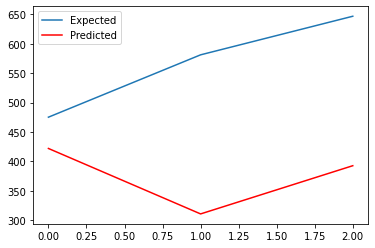

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
def colored(r, g, b, text):
    return f"\033[38;2;{r};{g};{b}m{text}\033[0m"

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = 33 # int(len(X) * 0.66)  #  <-----------  SIZE
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
  #model = ARIMA(history, order=(5,1,0))
  model = ARIMA(history, order=(0,0,1))
  model_fit = model.fit()
  print(model_fit.arparams, model_fit.maparams)
  print(model_fit.resid)
  #print(model_fit.params[0])
  print(colored(0, 0, 255, ("Intercept: "+ str(model_fit.params[0])+"   MA.coeff: "+ str(model_fit.params[1])+"   Sigma2: "+ str(model_fit.params[2]))))
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print(colored(255, 0, 0, ("Predicted: "+ str(yhat)+"   Expected: "+ str(obs))))
  #print('------->  predicted = %f, expected = %f' % (yhat, obs))
  print('--------------------------------------------------------------------------------------')

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="Expected")
pyplot.plot(predictions, color='red', label="Predicted")
pyplot.legend(loc="upper left")

pyplot.show()

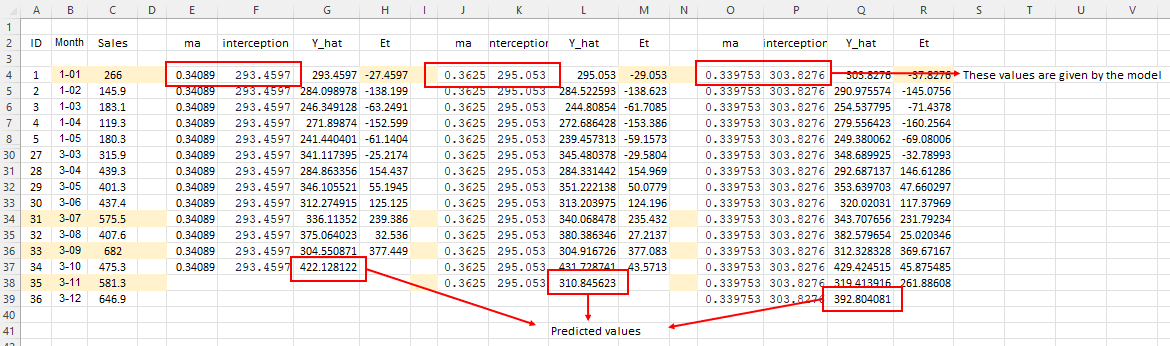

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -217.994
Date:                Tue, 07 Mar 2023   AIC                            441.987
Time:                        18:19:15   BIC                            446.653
Sample:                             0   HQIC                           443.598
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.8276     35.888      8.466      0.000     233.488     374.168
ma.L1          0.3398      0.268      1.266      0.206      -0.186       0.866
sigma2      1.499e+04   3899.183      3.844      0.0

### **ARMA model computed in python and by hand**

<ipython-input-1-874ab7056675>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


[0.97420613] [-0.58599916]
Parameteres: [ 3.48197142e+02  9.74206130e-01 -5.85999156e-01  6.86968343e+03]
[ -82.1971421  -134.38523162  -30.68344727  -84.86052943    6.46221117
  -12.37227445   51.43340153   19.8110274   -23.28489593  -87.5518052
  156.48526144  -59.20260692  -30.47880312  -66.63012998   16.42965116
   69.26570036  -43.24224754   66.21567484  -23.7761818    60.51524037
   20.61154689  142.27464019  -71.83383711   33.54655886   16.90614507
  110.38781257  -57.43456643   88.91032424   16.45127027   47.11015871
  168.00740018  -63.58478486  238.6715993 ]
Predicted: 533.5285766378488   Expected: 475.3
[0.97323755] [-0.60802572]
Parameteres: [ 3.37549058e+02  9.73237552e-01 -6.08025717e-01  6.77368209e+03]
[ -71.54905776 -134.35378846  -32.51476164  -86.28284203    4.05435543
  -13.56657467   50.55580056   20.56950634  -22.22463695  -87.28461126
  154.78763089  -56.51547925  -30.02105926  -66.88721158   14.89825146
   68.84766711  -41.7583169    66.29856437  -22.04158534   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[0.97688507] [-0.60056332]
Parameteres: [ 3.51449364e+02  9.76885073e-01 -6.00563315e-01  6.71983781e+03]
[ -85.44936408 -134.59423039  -31.06432874  -85.00917517    5.86809716
  -12.26370984   51.72987342   20.96510681  -22.04885094  -86.80688949
  156.18691882  -57.14727178  -29.74697204  -66.29739033   16.11621157
   69.61152199  -41.90029547   66.73669138  -22.41013436   61.2415426
   21.97338921  143.4737024   -69.31343086   34.16306799   17.70559848
  111.06174722  -55.74430146   89.10029657   17.54103051   47.78679324
  168.78573763  -61.35456379  238.85061763  -55.61442748   75.46281348]
Predicted: 530.666821914612   Expected: 646.9
Test RMSE: 87.773


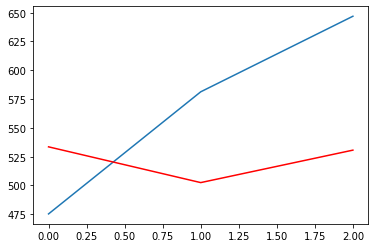

In [ ]:
# ARMA model
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
def colored(r, g, b, text):
    return f"\033[38;2;{r};{g};{b}m{text}\033[0m"

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = 33 # int(len(X) * 0.66)  #  <-----------  SIZE
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
  #model = ARIMA(history, order=(5,1,0))
  model = ARIMA(history, order=(1,0,1))
  model_fit = model.fit()
  print(model_fit.arparams, model_fit.maparams)
  print(colored(0, 0, 255, ("Parameteres: "+ str(model_fit.params))))
  print(model_fit.resid)
  #print(model_fit.summary())
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #print('------->  predicted = %f, expected = %f' % (yhat, obs))
  print(colored(255, 0, 0, ("Predicted: "+ str(yhat)+"   Expected: "+ str(obs))))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

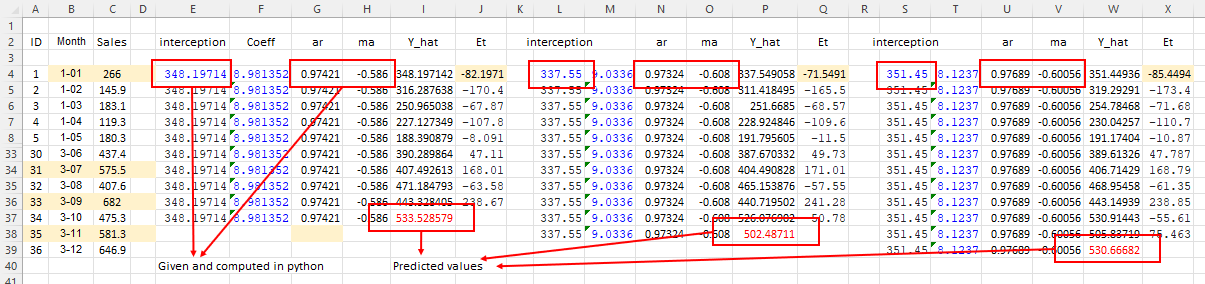

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -204.770
Date:                Tue, 07 Mar 2023   AIC                            417.541
Time:                        21:57:55   BIC                            423.762
Sample:                             0   HQIC                           419.688
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        351.4494    213.079      1.649      0.099     -66.179     769.078
ar.L1          0.9769      0.051     19.054      0.000       0.876       1.077
ma.L1         -0.6006      0.233     -2.576      0.0

### **AR Model**

<ipython-input-2-143edac321c7>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


[0.71747023] []
Parameteres: [3.14021870e+02 7.17470226e-01 9.86847959e+03]
[ -48.02187045 -133.66760821  -10.29943408 -100.78932648    5.98527393
  -49.58040985   22.18573882  -30.53012648  -56.99259383 -104.14878767
  159.60238112 -144.24925914  -27.79824311  -78.62499301   14.11767311
   33.83897742  -93.40514086   60.95567064  -68.63448295   52.73120083
  -16.6444887   124.88485339 -126.70597536   63.80859713    5.38941355
  107.95483614  -88.79441561  123.93062752   -2.60519836   60.75867022
  172.95799507  -94.02464313  300.8386078 ]
Predicted: 578.0352221919155   Expected: 475.3
[0.65105354] []
Parameteres: [3.02364309e+02 6.51053541e-01 9.85291408e+03]
[ -36.36430854 -132.78919669  -17.39766637 -105.41685811   -2.87964217
  -54.39390819   16.58852359  -31.92316557  -58.87047472 -108.13207746
  150.97656508 -138.68847135  -32.23980803  -82.50865777    7.25854088
   31.00469627  -92.04188754   56.8793975   -66.36132105   50.95294497
  -13.26880984  127.35062368 -115.49312772   64

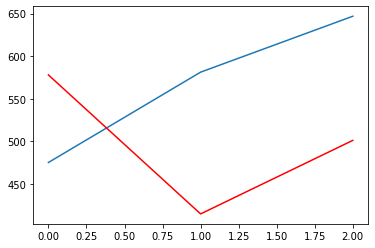

In [2]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
def colored(r, g, b, text):
    return f"\033[38;2;{r};{g};{b}m{text}\033[0m"

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = 33 # int(len(X) * 0.66)  #  <-----------  SIZE
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
  #model = ARIMA(history, order=(5,1,0))
  model = ARIMA(history, order=(1,0,0))  #   <------------- model
  model_fit = model.fit()
  print(model_fit.arparams, model_fit.maparams)
  print(colored(0, 0, 255, ("Parameteres: "+ str(model_fit.params))))
  print(model_fit.resid)
  #print(model_fit.summary())
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #print('------->  predicted = %f, expected = %f' % (yhat, obs))
  print(colored(255, 0, 0, ("Predicted: "+ str(yhat)+"   Expected: "+ str(obs))))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

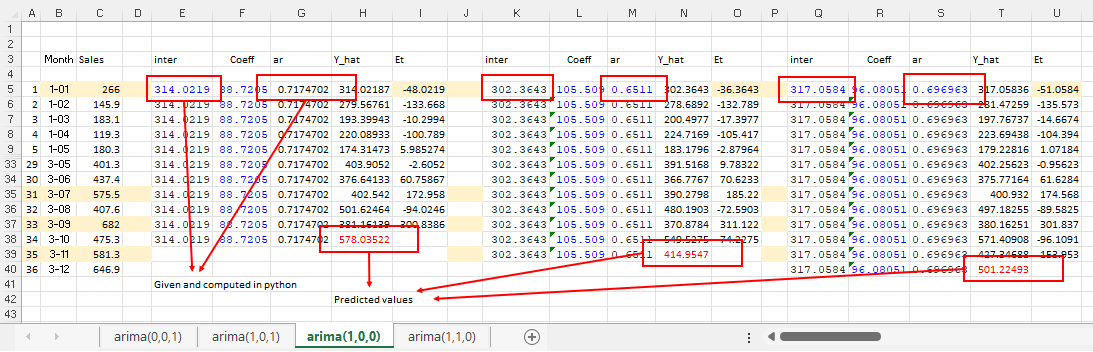

In [3]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -211.643
Date:                Tue, 07 Mar 2023   AIC                            429.285
Time:                        23:30:18   BIC                            433.951
Sample:                             0   HQIC                           430.896
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        317.0584     67.590      4.691      0.000     184.584     449.533
ar.L1          0.6970      0.147      4.726      0.000       0.408       0.986
sigma2      1.027e+04   2763.498      3.716      0.0

## **ARIMA Model**

ARIMA(1,1,0)

<ipython-input-7-ceeaebfae0bd>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


[-0.83043403 -0.43314417 -0.402714  ] []
Parameteres: [-8.30434026e-01 -4.33144174e-01 -4.02713997e-01  3.46514737e+03]
[ 266.         -118.57836305  -46.83487764  -48.53133147  -24.23467861
   26.20283793   54.22952011   64.72092639  -15.09616732  -73.89491506
  138.88217911  -16.26210365  -52.293477    -17.03615704  -33.61376126
   97.50224051  -21.2096197    79.36663336    8.36650958   35.36983114
   62.81934388  129.36948795  -22.41530784   -1.13327941   46.99825083
   68.97311934  -10.6703195    62.58152579   51.10240856    7.85560549]
Predicted: 374.18590304814825   Expected: 575.5
[-0.78425601 -0.31531558 -0.23329121] []
Parameteres: [-7.84256014e-01 -3.15315577e-01 -2.33291213e-01  4.62686918e+03]
[ 266.         -118.56517298  -41.85384121  -52.44571016   -5.32406896
   24.60091623   58.39604981   52.85344591  -20.21842923  -82.29538558
  147.08197496  -12.51880556  -58.66460443  -35.8677722    -7.01967529
   98.55942284  -23.67834229   65.43482436    2.89453393   40.79800188
 

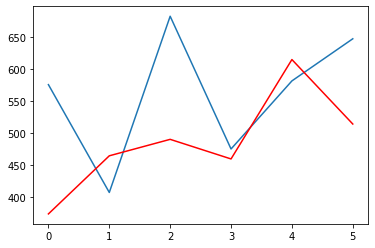

In [7]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
def colored(r, g, b, text):
    return f"\033[38;2;{r};{g};{b}m{text}\033[0m"

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = 30 # int(len(X) * 0.66)  #  <-----------  SIZE
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
  #model = ARIMA(history, order=(5,1,0))
  model = ARIMA(history, order=(3,1,0))  #   <------------- model
  model_fit = model.fit()
  print(model_fit.arparams, model_fit.maparams)
  print(colored(0, 0, 255, ("Parameteres: "+ str(model_fit.params))))
  print(model_fit.resid)
  #print(model_fit.summary())
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #print('------->  predicted = %f, expected = %f' % (yhat, obs))
  print(colored(255, 0, 0, ("Predicted: "+ str(yhat)+"   Expected: "+ str(obs))))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

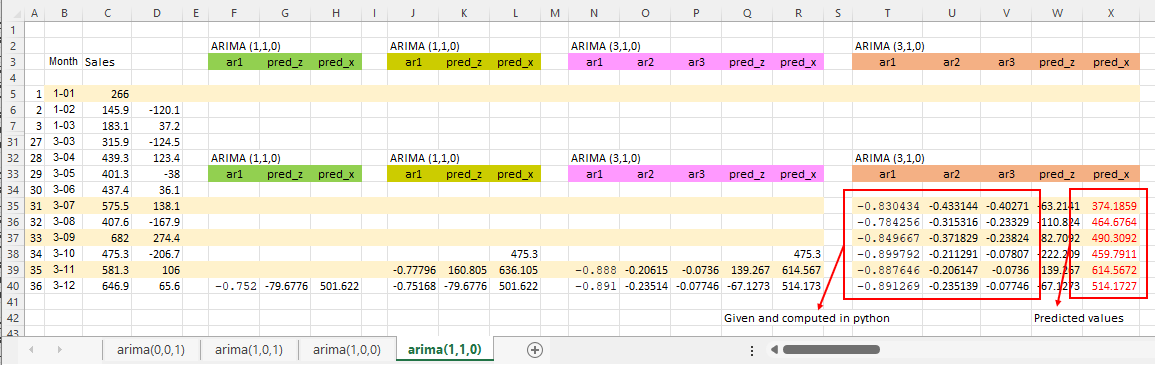

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -193.632
Date:                Tue, 07 Mar 2023   AIC                            395.264
Time:                        23:44:29   BIC                            401.369
Sample:                             0   HQIC                           397.346
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8913      0.234     -3.813      0.000      -1.349      -0.433
ar.L2         -0.2351      0.263     -0.895      0.371      -0.750       0.280
ar.L3         -0.0775      0.191     -0.405      0.6